<a href="https://colab.research.google.com/github/afnanhabib787/Artificial-Intelligence/blob/main/Fiver_machine_learning_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


In [63]:
dataset=pd.read_csv('dataset.csv')

In [64]:
dataset

,time,eda,ecg,KURT_YEO_JON,SKEW_YEO_JON,KURT,SKEW,KURT_SKEW,Median,MEAN,YEO_JON,condition
0,14.453787,0.750034,4.000000,-0.872122,0.182754,-0.658459,0.184866,-0.121727,-0.236797,1.512158,1.379498,0
1,15.197575,0.843789,0.000000,2.077375,1.261652,6.780783,1.344533,9.116986,4.062658,0.674965,0.535326,1
2,16.135118,0.937543,0.107451,-0.580068,0.060974,-0.470781,0.061216,-0.028819,-0.204783,2.364516,2.069282,0
3,17.094531,0.859414,0.151111,-1.576505,0.382939,-1.042015,0.391827,-0.408290,-0.325094,2.307603,1.982664,1
4,18.157081,1.061549,0.153501,0.981511,-1.386156,1.653076,-1.301444,-2.151385,0.175816,2.146484,1.950209,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3273,7840.561011,0.968794,0.078196,1.311371,-1.737100,2.673188,-1.613136,-4.312216,0.530026,1.907993,1.742669,0
3274,7841.593319,1.031197,0.079575,1.112883,-1.950234,2.020568,-1.800023,-3.637068,0.110273,2.041957,1.507142,1
3275,7841.614616,1.031197,0.078196,-0.196320,-0.015962,-0.180278,-0.015946,0.002875,-0.098112,1.739901,1.525211,0
3276,7843.718416,1.093800,0.077017,-0.200194,0.144528,-0.183562,0.145860,-0.026774,-0.018851,1.843506,1.683048,0


In [65]:

X=dataset.iloc[:,3:-1].values
y=dataset.iloc[:,-1].values

In [66]:
#splitting dataset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


In [67]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [68]:
#feature extraction using PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=8)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_


In [71]:
!pip install sklearn-genetic

     |████████████████████████████████| 160 kB 5.5 MB/s 


In [72]:
#feature selection using GA
from genetic_selection import GeneticSelectionCV
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier()
GA = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=8,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
GA = GA.fit(X, y)

In [73]:
!pip install ReliefF

     |████████████████████████████████| 48 kB 2.5 MB/s 
  Created wheel for ReliefF: filename=ReliefF-0.1.2-py3-none-any.whl size=6318 sha256=be74b9c29fe3cc157b72f4e9ef0275f9a6e09350e29bb34cb7ed539264a08cf6
  Stored in directory: /root/.cache/pip/wheels/18/8a/4a/3aada56cb869df4c1b1ed6af509c941a25985d1d1258a2e78c
Successfully built ReliefF


In [74]:
#Feature selection using ReliefF
from ReliefF import ReliefF
fs = ReliefF(n_neighbors=1, n_features_to_keep=8)
X_train = fs.fit_transform(X_train, y_train)

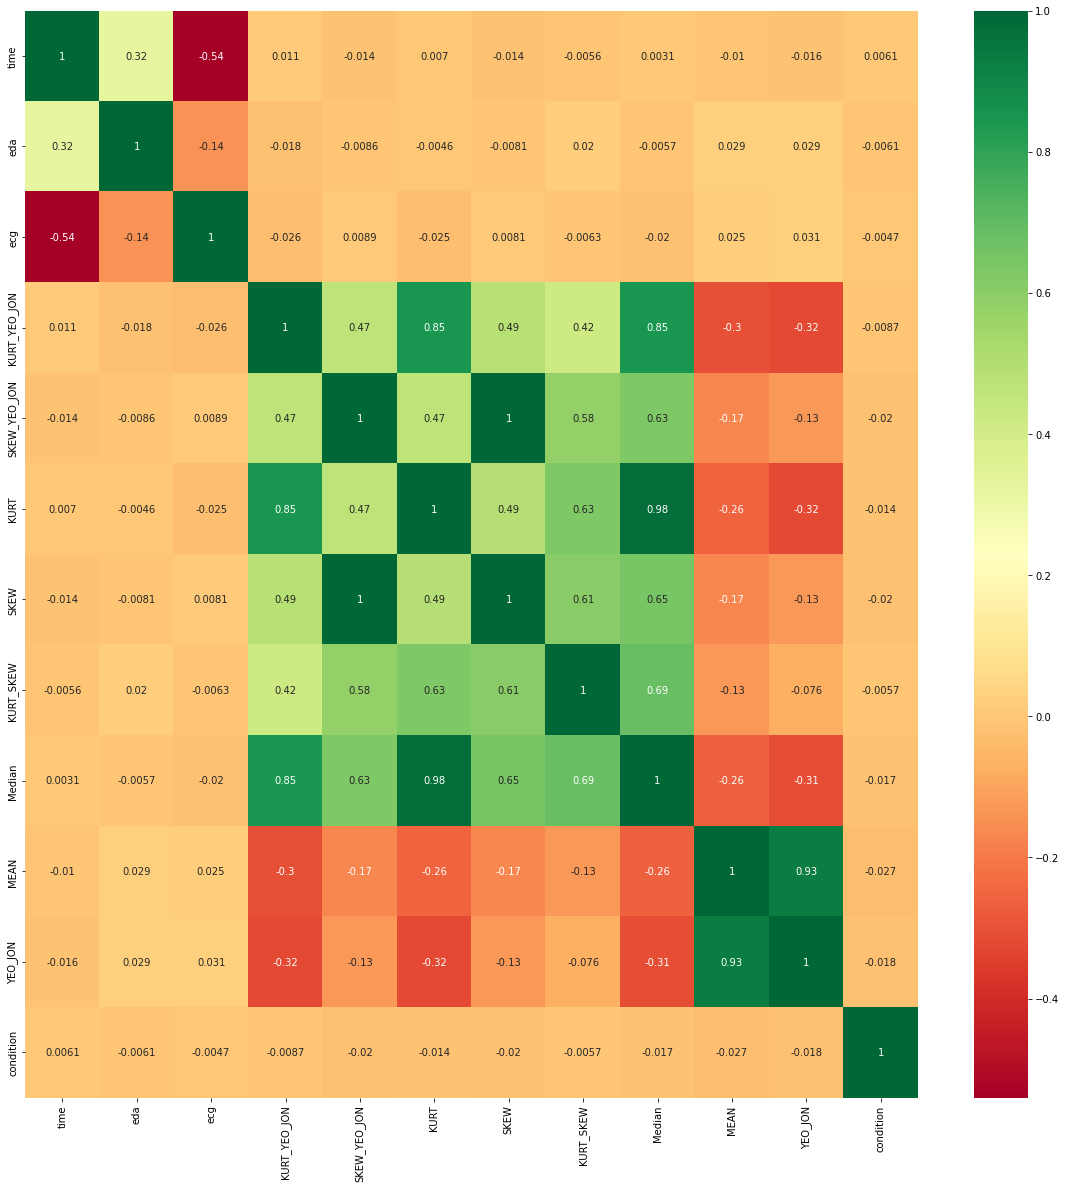

In [75]:
#using HeatMap
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

##Classification using kNN

Precision:  0.6728624535315985
Recall:  0.9836956521739131


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


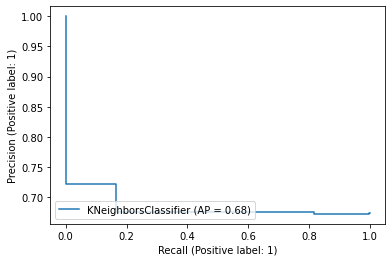

In [76]:
#classification using kNN
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn_classifier.fit(X_train,y_train)

knn_pred=knn_classifier.predict(X_test)

knn_pred=(knn_pred>0.5)

cm_knn=confusion_matrix(y_test, knn_pred)

accuracy_knn=cross_val_score(estimator=knn_classifier, X=X_train,y=y_train,cv=10)
accuracy_knn.mean()
accuracy_knn.std()

precision_knn = precision_score(y_test, knn_pred)
recall_knn = recall_score(y_test, knn_pred)
 
print('Precision: ',precision_knn)
print('Recall: ',recall_knn)
 
#Plotting Precision-Recall Curve
disp_knn = plot_precision_recall_curve(knn_classifier, X_test, y_test)






##Classification using SVM

Precision:  0.6731707317073171
Recall:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


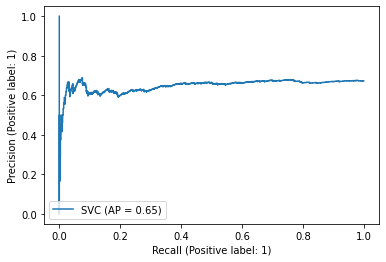

In [77]:
#classification using SVM
from sklearn.svm import SVC
svm_classifier=SVC(kernel='rbf',random_state=0)
svm_classifier.fit(X_train,y_train)

svm_pred=svm_classifier.predict(X_test)

svm_pred=(svm_pred>0.5)

cm_svm=confusion_matrix(y_test, svm_pred)

accuracy_svm=cross_val_score(estimator=svm_classifier, X=X_train,y=y_train,cv=10)
accuracy_svm.mean()
accuracy_svm.std()

precision_svm = precision_score(y_test, svm_pred)
recall_svm = recall_score(y_test,svm_pred)
 
print('Precision: ',precision_svm)
print('Recall: ',recall_svm)
 
#Plotting Precision-Recall Curve
disp_svm = plot_precision_recall_curve(svm_classifier, X_test, y_test)

##Classification using Bagging SVM

Precision:  0.6731707317073171
Recall:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


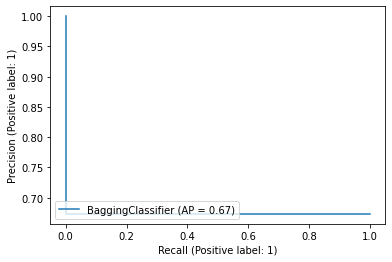

In [78]:
#classification using Bagging SVM
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
svm_classifier=SVC(kernel='rbf',random_state=0)
bagged_svm_classifier = BaggingClassifier(base_estimator=svm_classifier, n_estimators=10, random_state=0)

bagged_svm_classifier.fit(X_train,y_train)

bagged_svm_pred=bagged_svm_classifier.predict(X_test)

bagged_svm_pred=(bagged_svm_pred>0.5)

cm_bagged_svm=confusion_matrix(y_test, bagged_svm_pred)

accuracy_bagged_svm=cross_val_score(estimator=bagged_svm_classifier, X=X_train,y=y_train,cv=10)
accuracy_bagged_svm.mean()
accuracy_bagged_svm.std()

precision_bagged_svm = precision_score(y_test, bagged_svm_pred)
recall_bagged_svm = recall_score(y_test,bagged_svm_pred)
 
print('Precision: ',precision_bagged_svm)
print('Recall: ',recall_bagged_svm)
 
#Plotting Precision-Recall Curve
disp_svm = plot_precision_recall_curve(bagged_svm_classifier, X_test, y_test)

##Classification using RandomForest

Precision:  0.6795180722891566
Recall:  0.5108695652173914


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


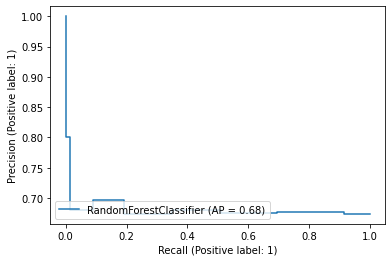

In [79]:
#classification using RandomForest
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rf_classifier.fit(X_train,y_train)

rf_pred=rf_classifier.predict(X_test)

rf_pred=(rf_pred>0.5)

cm_rf=confusion_matrix(y_test, rf_pred)

accuracy_rf=cross_val_score(estimator=rf_classifier, X=X_train,y=y_train,cv=10)
accuracy_rf.mean()
accuracy_rf.std()

precision_rf = precision_score(y_test, rf_pred)
recall_rf = recall_score(y_test, rf_pred)
 
print('Precision: ',precision_rf)
print('Recall: ',recall_rf)
 
#Plotting Precision-Recall Curve
disp_knn = plot_precision_recall_curve(rf_classifier, X_test, y_test)

##Using gradient boosting

Precision:  0.671604938271605
Recall:  0.9855072463768116


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


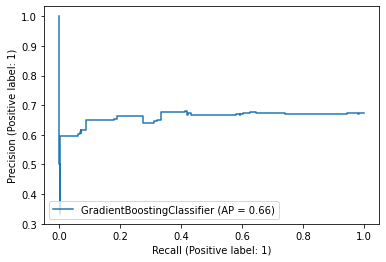

In [80]:
#using gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier=GradientBoostingClassifier(n_estimators=10,random_state=0)
gb_classifier.fit(X_train,y_train)

gb_pred=gb_classifier.predict(X_test)

gb_pred=(gb_pred>0.5)

cm_gb=confusion_matrix(y_test,gb_pred)

accuracy_gb=cross_val_score(estimator=gb_classifier, X=X_train,y=y_train,cv=10)
accuracy_gb.mean()
accuracy_gb.std()

precision_gb = precision_score(y_test, gb_pred)
recall_gb = recall_score(y_test,gb_pred)
 
print('Precision: ',precision_gb)
print('Recall: ',recall_gb)
 
#Plotting Precision-Recall Curve
disp_knn = plot_precision_recall_curve(gb_classifier, X_test, y_test)

##Classification using xgboost

Precision:  0.6729559748427673
Recall:  0.9692028985507246


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


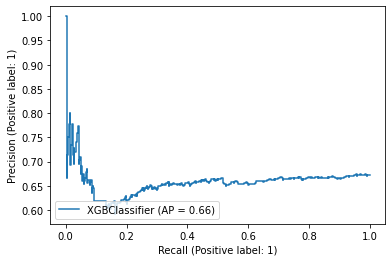

In [81]:
#classification using xgboost
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_classifier.fit(X_train,y_train)

xgb_pred=xgb_classifier.predict(X_test)
xgb_pred=(xgb_pred>0.5)

cm_xgb=confusion_matrix(y_test,xgb_pred)

accuracy_xgb=cross_val_score(estimator=xgb_classifier, X=X_train,y=y_train,cv=10)
accuracy_xgb.mean()
accuracy_xgb.std()

precision_xgb = precision_score(y_test, xgb_pred)
recall_xgb = recall_score(y_test,xgb_pred)
 
print('Precision: ',precision_xgb)
print('Recall: ',recall_xgb)
 
#Plotting Precision-Recall Curve
disp_knn = plot_precision_recall_curve(xgb_classifier, X_test, y_test)

##For neural networks

In [82]:
#for neural networks
training_set=dataset.iloc[:,1:2].values
training_set

array([[0.750034],
       [0.843789],
       [0.937543],
       ...,
       [1.031197],
       [1.0938  ],
       [0.796911]])

##Using LSTM

In [83]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
training_set_scaled=sc.fit_transform(training_set)

X_train=[]
y_train=[]


#Using RNN(LSTM)
for i in range(60,len(dataset)):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))



In [84]:

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten

regressor=Sequential()

regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))


regressor.add(LSTM(units=50,return_sequences=True))


regressor.add(Dense(units=1))

regressor.compile(optimizer='adam',loss='mean_squared_error') 

regressor.fit(X_train,y_train,epochs=10,batch_size=32)           



Epoch 1/10
101/101 [==============================] - 29s 29ms/step - loss: 0.9876
Epoch 2/10
101/101 [==============================] - 3s 29ms/step - loss: 0.9871
Epoch 3/10
101/101 [==============================] - 3s 29ms/step - loss: 0.9876
Epoch 4/10
101/101 [==============================] - 3s 28ms/step - loss: 0.9869
Epoch 5/10
101/101 [==============================] - 3s 28ms/step - loss: 0.9870
Epoch 6/10
101/101 [==============================] - 3s 31ms/step - loss: 0.9867
Epoch 7/10
101/101 [==============================] - 3s 30ms/step - loss: 0.9869
Epoch 8/10
101/101 [==============================] - 3s 29ms/step - loss: 0.9867
Epoch 9/10
101/101 [==============================] - 3s 29ms/step - loss: 0.9869
Epoch 10/10
101/101 [==============================] - 3s 29ms/step - loss: 0.9866


In [85]:
print("Evaluate on test data")
results = regressor.evaluate(X_train, y_train)
print("test loss:", results)
print("test accuracy:",1-results)  

Evaluate on test data
101/101 [==============================] - 2s 12ms/step - loss: 0.9839
test loss: 0.9839467406272888
test accuracy: 0.01605325937271118


##Using 1DCNN

In [86]:

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=5, input_shape=(X_train.shape[1],1)))
model.add(MaxPooling1D(pool_size=5 ))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  

model.compile(optimizer='adam',loss='mean_squared_error') 

model.fit(X_train,y_train,epochs=10,batch_size=32) 

Epoch 1/10
101/101 [==============================] - 2s 6ms/step - loss: 0.8910
Epoch 2/10
101/101 [==============================] - 1s 7ms/step - loss: 0.8553
Epoch 3/10
101/101 [==============================] - 1s 8ms/step - loss: 0.8466
Epoch 4/10
101/101 [==============================] - 1s 7ms/step - loss: 0.8376
Epoch 5/10
101/101 [==============================] - 1s 7ms/step - loss: 0.8324
Epoch 6/10
101/101 [==============================] - 1s 7ms/step - loss: 0.8254
Epoch 7/10
101/101 [==============================] - 1s 6ms/step - loss: 0.8177
Epoch 8/10
101/101 [==============================] - 1s 6ms/step - loss: 0.8131
Epoch 9/10
101/101 [==============================] - 1s 7ms/step - loss: 0.8081
Epoch 10/10
101/101 [==============================] - 1s 7ms/step - loss: 0.8062


In [87]:
print("Evaluate on test data")
results = model.evaluate(X_train, y_train)
print("test loss:", results)
print("test accuracy:",1-results)  

Evaluate on test data
101/101 [==============================] - 0s 3ms/step - loss: 0.7884
test loss: 0.788361132144928
test accuracy: 0.21163886785507202


##Using RbfNN

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rbf_layer_1 (RBFLayer)      (None, 34)                306       
                                                                 
 dense_8 (Dense)             (None, 4)                 140       
                                                                 
 activation_1 (Activation)   (None, 4)                 0         
                                                                 
Total params: 446
Trainable params: 446
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
77/77 [==============================] - 2s 8ms/step - loss: 0.6159 - accuracy: 0.2075
Epoch 2/1000
77/77 [==============================] - 1s 8ms/step - loss: 0.5042 - accuracy: 0.2079
Epoch 3/1000
77/77 [==============================] - 1s 8ms/step - loss: 0.4146 - accuracy: 0.2087
Epoch 4/1000
77

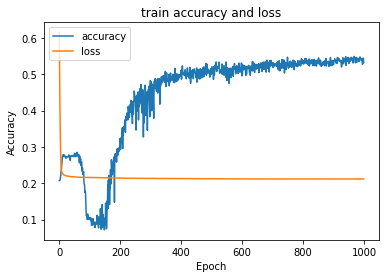

Evaluate on test data
26/26 [==============================] - 0s 3ms/step - loss: 0.2469 - accuracy: 0.4622
test loss: 0.24685241281986237
test accuracy: 46.219512820243835 %


In [89]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer, InputSpec
import tensorflow.python.keras.engine

from tensorflow.keras.initializers import RandomUniform, Initializer, Constant
import numpy as np


class InitCentersRandom(Initializer):
    """ Initializer for initialization of centers of RBF network
        as random samples from the given data set.
    # Arguments
        X: matrix, dataset to choose the centers from (random rows
          are taken as centers)
    """

    def __init__(self, X):
        self.X = X

    def __call__(self, shape, dtype=None):
        assert shape[1] == self.X.shape[1]
        idx = np.random.randint(self.X.shape[0], size=shape[0])
        return self.X[idx, :]


class RBFLayer(Layer):
    """ Layer of Gaussian RBF units.
    # Example
    ```python
        model = Sequential()
        model.add(RBFLayer(10,
                           initializer=InitCentersRandom(X),
                           betas=1.0,
                           input_shape=(1,)))
        model.add(Dense(1))
    ```
    # Arguments
        output_dim: number of hidden units (i.e. number of outputs of the
                    layer)
        initializer: instance of initiliazer to initialize centers
        betas: float, initial value for betas
    """

    def __init__(self, output_dim, initializer=None, betas=1.0, **kwargs):
        self.output_dim = output_dim
        self.init_betas = betas
        if not initializer:
            self.initializer = RandomUniform(0.0, 1.0)
        else:
            self.initializer = initializer
        super(RBFLayer, self).__init__(**kwargs)

    def build(self, input_shape):

        self.centers = self.add_weight(name='centers',
                                       shape=(self.output_dim, input_shape[1]),
                                       initializer=self.initializer,
                                       trainable=True)
        self.betas = self.add_weight(name='betas',
                                     shape=(self.output_dim,),
                                     initializer=Constant(
                                         value=self.init_betas),
                                     # initializer='ones',
                                     trainable=True)

        super(RBFLayer, self).build(input_shape)

    def call(self, x):

        C = K.expand_dims(self.centers)
        H = K.transpose(C-K.transpose(x))
        return K.exp(-self.betas * K.sum(H**2, axis=1))

        # C = self.centers[np.newaxis, :, :]
        # X = x[:, np.newaxis, :]

        # diffnorm = K.sum((C-X)**2, axis=-1)
        # ret = K.exp( - self.betas * diffnorm)
        # return ret

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

    def get_config(self):
        # have to define get_config to be able to use model_from_json
        config = {
            'output_dim': self.output_dim
        }
        base_config = super(RBFLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

from tensorflow.keras.initializers import Initializer
from sklearn.cluster import KMeans


class InitCentersKMeans(Initializer):
    """ Initializer for initialization of centers of RBF network
        by clustering the given data set.
    # Arguments
        X: matrix, dataset
    """

    def __init__(self, X, max_iter=100):
        self.X = X
        self.max_iter = max_iter

    def __call__(self, shape, dtype=None):
        assert shape[1] == self.X.shape[1]

        n_centers = shape[0]
        km = KMeans(n_clusters=n_centers, max_iter=self.max_iter, verbose=0)
        km.fit(self.X)
        return km.cluster_centers_

import numpy as np, pandas as pd
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

dataset=pd.read_csv('dataset.csv')

X=dataset.iloc[:,3:-1].values
y=dataset.iloc[:,-1].values


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

model = Sequential()
rbflayer = RBFLayer(34,
                        initializer=InitCentersKMeans(X_train),
                        betas=3.0,
                        input_shape=(8,))

model.add(rbflayer)
model.add(Dense(4))
model.add(Activation('linear'))
model.compile(loss='mean_squared_error',
                  optimizer=RMSprop(), metrics=['accuracy'])
print(model.summary())

history1 = model.fit(X_train, y_train, epochs=1000, batch_size=32)

import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('train accuracy and loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=32)
print("test loss:", results[0])
print("test accuracy:",results[1]*100,'%')          


##Using AdaBoostClassifier

Precision:  0.6769420468557337
Recall:  0.9945652173913043


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


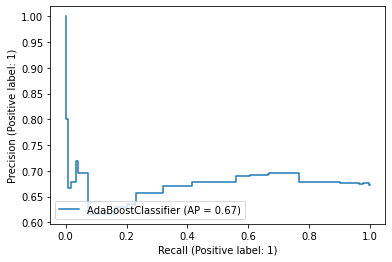

In [90]:

from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=10,random_state=0)
ad.fit(X_train,y_train)

ad_pred=ad.predict(X_test)

ad_pred=(ad_pred>0.5)

cm_gb=confusion_matrix(y_test,ad_pred)

accuracy_gb=cross_val_score(estimator=ad, X=X_train,y=y_train,cv=10)
accuracy_gb.mean()
accuracy_gb.std()

precision_gb = precision_score(y_test, ad_pred)
recall_gb = recall_score(y_test,ad_pred)
 
print('Precision: ',precision_gb)
print('Recall: ',recall_gb)
 
#Plotting Precision-Recall Curve
disp_knn = plot_precision_recall_curve(ad, X_test, y_test)

##Classification using Bagging RF

Precision:  0.6736214605067065
Recall:  0.8188405797101449


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


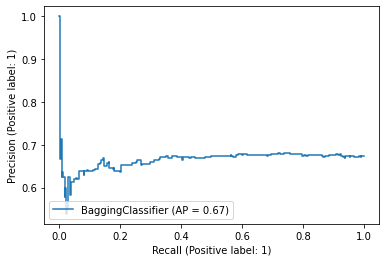

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
rf_classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
bagged_rf_classifier = BaggingClassifier(base_estimator=rf_classifier, n_estimators=10, random_state=0)

bagged_rf_classifier.fit(X_train,y_train)

bagged_rf_pred=bagged_rf_classifier.predict(X_test)

bagged_rf_pred=(bagged_rf_pred>0.5)

cm_bagged_rf=confusion_matrix(y_test, bagged_rf_pred)

accuracy_bagged_rf=cross_val_score(estimator=bagged_rf_classifier, X=X_train,y=y_train,cv=10)
accuracy_bagged_rf.mean()
accuracy_bagged_rf.std()

precision_bagged_rf = precision_score(y_test, bagged_rf_pred)
recall_bagged_rf = recall_score(y_test,bagged_rf_pred)
 
print('Precision: ',precision_bagged_rf)
print('Recall: ',recall_bagged_rf)
 
#Plotting Precision-Recall Curve
disp_svm = plot_precision_recall_curve(bagged_rf_classifier, X_test, y_test)

##Bootstrap aggregation

In [92]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

# Pipeline Estimator
#
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))
#
# Fit the model
#
pipeline.fit(X_train, y_train)
# Model scores on test and training data
#
print('Model test Score: %.3f, ' %pipeline.score(X_test, y_test),
      'Model training Score: %.3f' %pipeline.score(X_train, y_train))

Model test Score: 0.671,  Model training Score: 0.662


In [93]:
# Instantiate the bagging classifier
#
bgclassifier = BaggingClassifier(base_estimator=pipeline, n_estimators=10,
                                 random_state=0)
#
# Fit the bagging classifier
#
bgclassifier.fit(X_train, y_train)
#
# Model scores on test and training data
#
print('Model test Score: %.3f, ' %bgclassifier.score(X_test, y_test),
      'Model training Score: %.3f' %bgclassifier.score(X_train, y_train))

Model test Score: 0.671,  Model training Score: 0.662


##Using RNN

In [94]:

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, SimpleRNN
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten

regressor=Sequential()

regressor.add(SimpleRNN(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))

regressor.add(SimpleRNN(units=50,return_sequences=True))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam',loss='mean_squared_error') 

regressor.fit(X_train,y_train,epochs=10,batch_size=32)     

Epoch 1/10
77/77 [==============================] - 4s 29ms/step - loss: 0.3274
Epoch 2/10
77/77 [==============================] - 2s 28ms/step - loss: 0.2295
Epoch 3/10
77/77 [==============================] - 2s 29ms/step - loss: 0.2287
Epoch 4/10
77/77 [==============================] - 2s 26ms/step - loss: 0.2259
Epoch 5/10
77/77 [==============================] - 2s 26ms/step - loss: 0.2270
Epoch 6/10
77/77 [==============================] - 2s 27ms/step - loss: 0.2261
Epoch 7/10
77/77 [==============================] - 2s 27ms/step - loss: 0.2260
Epoch 8/10
77/77 [==============================] - 2s 29ms/step - loss: 0.2261
Epoch 9/10
77/77 [==============================] - 2s 28ms/step - loss: 0.2258
Epoch 10/10
77/77 [==============================] - 2s 27ms/step - loss: 0.2250


In [95]:
print("Evaluate on test data")
results = regressor.evaluate(X_train, y_train)
print("test loss:", results)
print("test accuracy:",1-results)  

Evaluate on test data
77/77 [==============================] - 1s 6ms/step - loss: 0.2246
test loss: 0.22458533942699432
test accuracy: 0.7754146605730057


In [ ]:
!pip install -r requirements.txt

##Deep Belief Network

In [57]:
import numpy as np

np.random.seed(1337)  # for reproducibility
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from dbn import SupervisedDBNRegression

regressor = SupervisedDBNRegression(hidden_layers_structure=[100],
                                    learning_rate_rbm=0.01,
                                    learning_rate=0.01,
                                    n_epochs_rbm=20,
                                    n_iter_backprop=200,
                                    batch_size=16,
                                    activation_function='relu')
regressor.fit(X_train, y_train)

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 8.211096
>> Epoch 2 finished 	RBM Reconstruction error 1575.215497
>> Epoch 3 finished 	RBM Reconstruction error 1341002.150902
>> Epoch 4 finished 	RBM Reconstruction error 50439.094838
>> Epoch 5 finished 	RBM Reconstruction error 58815.125777


/usr/local/lib/python3.7/dist-packages/numpy/core/numeric.py:909: RuntimeWarning: overflow encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)
/usr/local/lib/python3.7/dist-packages/numpy/core/numeric.py:909: RuntimeWarning: invalid value encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)


>> Epoch 6 finished 	RBM Reconstruction error nan
>> Epoch 7 finished 	RBM Reconstruction error nan
>> Epoch 8 finished 	RBM Reconstruction error nan
>> Epoch 9 finished 	RBM Reconstruction error nan
>> Epoch 10 finished 	RBM Reconstruction error nan
>> Epoch 11 finished 	RBM Reconstruction error nan
>> Epoch 12 finished 	RBM Reconstruction error nan
>> Epoch 13 finished 	RBM Reconstruction error nan
>> Epoch 14 finished 	RBM Reconstruction error nan
>> Epoch 15 finished 	RBM Reconstruction error nan
>> Epoch 16 finished 	RBM Reconstruction error nan
>> Epoch 17 finished 	RBM Reconstruction error nan
>> Epoch 18 finished 	RBM Reconstruction error nan
>> Epoch 19 finished 	RBM Reconstruction error nan
>> Epoch 20 finished 	RBM Reconstruction error nan
[END] Pre-training step
[START] Fine tuning step:
>> Epoch 1 finished 	ANN training loss nan
>> Epoch 2 finished 	ANN training loss nan
>> Epoch 3 finished 	ANN training loss nan
>> Epoch 4 finished 	ANN training loss nan
>> Epoch 5 finish

SupervisedDBNRegression()

Cloning into 'deep-belief-network'...
remote: Enumerating objects: 795, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 795 (delta 13), reused 6 (delta 2), pack-reused 763
Receiving objects: 100% (795/795), 181.30 KiB | 783.00 KiB/s, done.
Resolving deltas: 100% (459/459), done.


##Using Gradient Boosting Regression

In [59]:

from sklearn.ensemble import GradientBoostingRegressor

gb_regressor=GradientBoostingRegressor(n_estimators=10,random_state=0)
gb_regressor.fit(X_train,y_train)

gb_pred=gb_regressor.predict(X_test)

gb_pred=(gb_pred>0.5)

cm_gb=confusion_matrix(y_test,gb_pred)

accuracy_gb=cross_val_score(estimator=gb_regressor, X=X_train,y=y_train,cv=10)
accuracy_gb.mean()
accuracy_gb.std()

precision_gb = precision_score(y_test, gb_pred)
recall_gb = recall_score(y_test,gb_pred)
 
print('Precision: ',precision_gb)
print('Recall: ',recall_gb)
 

Precision:  0.6736453201970444
Recall:  0.9909420289855072


##GaussianNB

Precision:  0.6683354192740926
Recall:  0.967391304347826


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


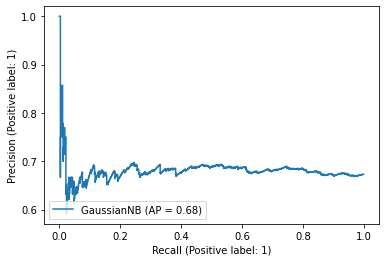

In [62]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
#using AdaBoostClassifier

gnb.fit(X_train,y_train)

gnb_pred=gnb.predict(X_test)

gnb_pred=(gnb_pred>0.5)

cm_gnb=confusion_matrix(y_test,gnb_pred)

accuracy_gnb=cross_val_score(estimator=gnb, X=X_train,y=y_train,cv=10)
accuracy_gnb.mean()
accuracy_gnb.std()

precision_gnb = precision_score(y_test, gnb_pred)
recall_gnb = recall_score(y_test,gnb_pred)
 
print('Precision: ',precision_gnb)
print('Recall: ',recall_gnb)
 
#Plotting Precision-Recall Curve
disp_knn = plot_precision_recall_curve(gnb, X_test, y_test)

##MultinomialNB

Precision:  0.6731707317073171
Recall:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


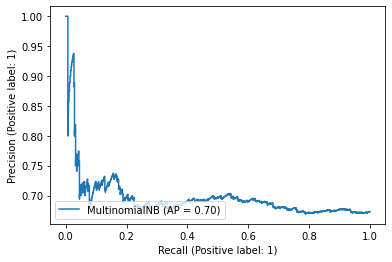

In [74]:

from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

mnb = MultinomialNB()

 
mnb.fit(X_train,y_train)

mnb_pred=mnb.predict(X_test)

mnb_pred=(mnb_pred>0.5)

cm_mnb=confusion_matrix(y_test,mnb_pred)

accuracy_mnb=cross_val_score(estimator=mnb, X=X_train,y=y_train,cv=10)
accuracy_mnb.mean()
accuracy_mnb.std()

precision_mnb = precision_score(y_test, mnb_pred)
recall_mnb = recall_score(y_test,mnb_pred)
 
print('Precision: ',precision_mnb)
print('Recall: ',recall_mnb)
 
#Plotting Precision-Recall Curve
disp_knn = plot_precision_recall_curve(mnb, X_test, y_test)

In [22]:
import numpy as np

dic = {
    "Model":['kNN','SVM','Bagging SVM','RandomForest','Gradient Boosting','XGBoost','LSTM','1DCNN','RbfNN','AdaBoostClassifier','Bagging Random Forest','Bootstrap aggregation','RNN','Deep Belief Network','Gradient Boosting Regression','GaussianNB','MultinomialNB'],
    "Precision":[0.6728624535315985,0.6731707317073171,0.6731707317073171,0.6795180722891566,0.671604938271605,0.6729559748427673,0.020309269428253174,0.21845442056655884,0.4158536493778229,0.6769420468557337,0.6736214605067065,0.671,0.7754146605730057,np.NaN,0.6736453201970444,0.6683354192740926,0.6731707317073171],
    "Recall":[0.9836956521739131,1.0,1.0,0.5108695652173914,0.9855072463768116,0.9692028985507246,np.NaN,np.NaN,np.NaN,0.9945652173913043,0.8188405797101449,np.NaN,np.NaN,np.NaN,0.9909420289855072,0.967391304347826,1.0]
}

In [23]:
import pandas as pd
pd.DataFrame(dic)

,Model,Precision,Recall
0,kNN,0.672862,0.983696
1,SVM,0.673171,1.000000
2,Bagging SVM,0.673171,1.000000
3,RandomForest,0.679518,0.510870
4,Gradient Boosting,0.671605,0.985507
5,XGBoost,0.672956,0.969203
6,LSTM,NaN,NaN
7,1DCNN,NaN,NaN
8,RbfNN,0.415854,NaN
9,AdaBoostClassifier,0.676942,0.994565
